In [ ]:
"""Ce script est pour visualiser la longueur de chaque texte dans le corpus,
le Zipf et la ratio de type et longeur"""

In [14]:
import json
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [15]:

#chargement des modèles de langues
nlp_en = spacy.load('en_core_web_sm')
nlp_fr = spacy.load('fr_core_news_sm')

#chargement du corpus
with open('../data/clean/corpus_traité.json', 'r', encoding='utf-8') as file:
    corpus = [json.loads(line) for line in file]

#création d'un dataframe
df = pd.DataFrame(corpus)


In [16]:


def calculate_ratios(df):
# Fonction pour calculer les ratios de types et de longueurs
    en_types = []
    fr_types = []
    en_lengths = []
    fr_lengths = []
    en_tokens = []
    fr_tokens = []

    for index, row in df.iterrows():
        # Créer un objet Doc pour chaque phrase
        doc_en = nlp_en(row['en'])
        doc_fr = nlp_fr(row['fr'])

        # Compter les types (mots uniques)
        en_type_count = len(set([token.lemma_ for token in doc_en if token.is_alpha]))
        fr_type_count = len(set([token.lemma_ for token in doc_fr if token.is_alpha]))
        
        # Compter les tokens (mots)
        en_length = len(row['en'])
        fr_length = len(row['fr'])

        # Ajouter les lemmes à la liste des tokens
        en_tokens.extend([token.lemma_ for token in doc_en if token.is_alpha])
        fr_tokens.extend([token.lemma_ for token in doc_fr if token.is_alpha])

        en_types.append(en_type_count)
        fr_types.append(fr_type_count)
        en_lengths.append(en_length)
        fr_lengths.append(fr_length)

    # Ajouter les colonnes au DataFrame
    df['en_types'] = en_types
    df['fr_types'] = fr_types
    df['type_ratio'] = df['fr_types'] / df['en_types']
    df['en_length'] = en_lengths
    df['fr_length'] = fr_lengths
    df['length_ratio'] = df['fr_length'] / df['en_length']

    return df, en_tokens, fr_tokens


In [17]:

# Calculer les ratios
df, en_tokens, fr_tokens = calculate_ratios(df)

In [18]:

# Afficher les ratios
display(df[['en', 'fr', 'type_ratio', 'length_ratio']])

# Afficher les moyennes des ratios
avg_type_ratio = df['type_ratio'].mean()
avg_length_ratio = df['length_ratio'].mean()

print(f'Average Type Ratio: {avg_type_ratio}')
print(f'Average Length Ratio: {avg_length_ratio}')


,en,fr,type_ratio,length_ratio
0,"Hello voice mail, my old friend.","Bonjour répondeur, mon vieil ami.",0.833333,1.031250
1,People are feeling overwhelmed.,"Que c'est trop de technologie, trop vite.",1.500000,1.322581
2,(Laughter),"(Rires) Je connais les ficelles maintenant, je...",10.000000,7.300000
3,"These people are reaching thousands, if not mi...","J'ai aussi un ami, qui a un blog sur le numéri...",0.857143,0.928571
4,This is what happened to me.,"Je me suis dit que j'allais gagner un prix, pa...",2.166667,3.071429
...,...,...,...,...
2409,"""So we have very diverse contributors in terms...",Et la méthode qui est née organiquement au sei...,1.500000,1.650000
2410,there's lots of tools that allow us -- allow u...,Parfois les gens -- des trolls quelconques sur...,1.230769,1.685393
2411,What's happened in the music world,Mais il y a un besoin pour une petite dose de ...,4.666667,6.294118
2412,"""The first thing I'd like you to do",Pourquoi ça coûte 22 dollars?,0.500000,0.828571


Average Type Ratio: 2.0037164937258227
Average Length Ratio: 2.199973089716899


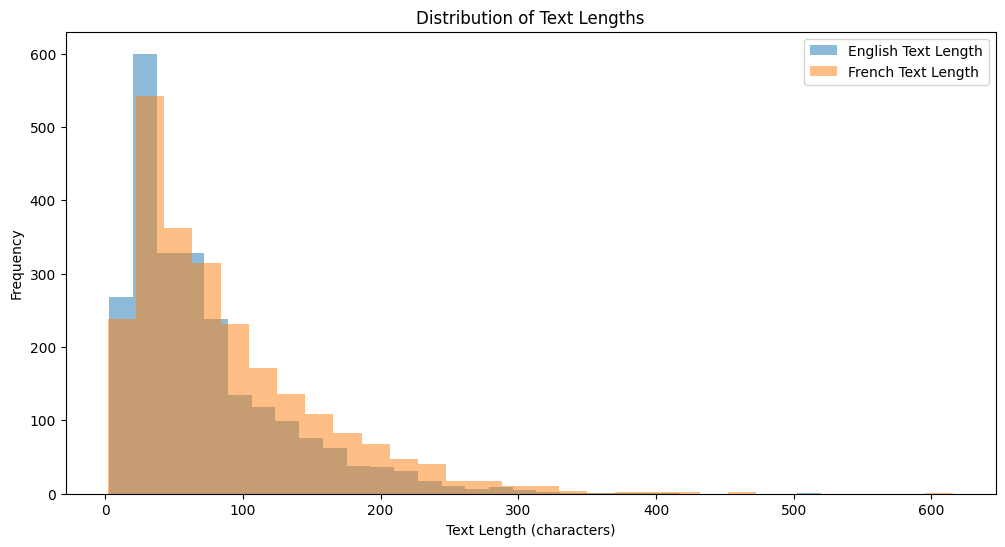

In [19]:

# Afficher les longeurs des textes
plt.figure(figsize=(12, 6))
plt.hist(df['en_length'], bins=30, alpha=0.5, label='English Text Length')
plt.hist(df['fr_length'], bins=30, alpha=0.5, label='French Text Length')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.legend()
plt.show()


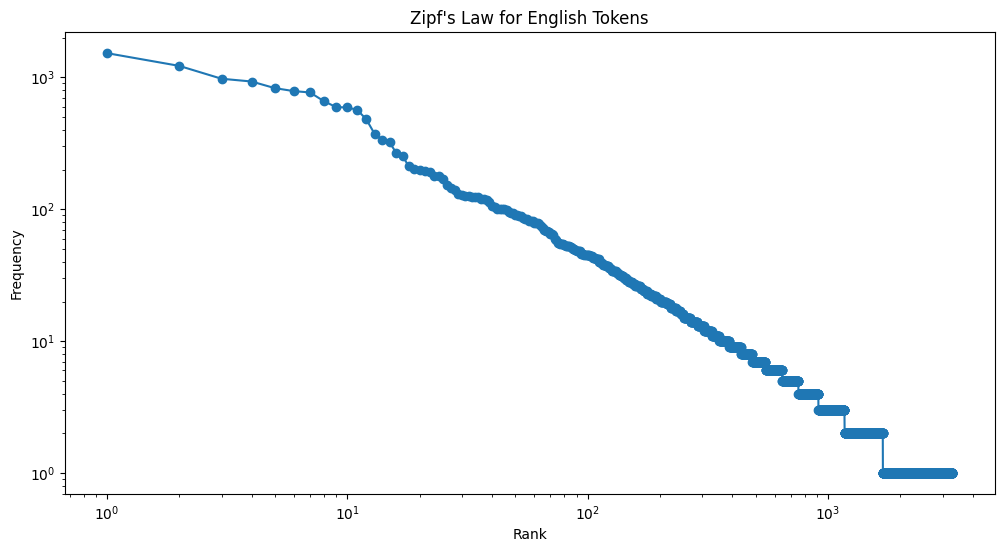

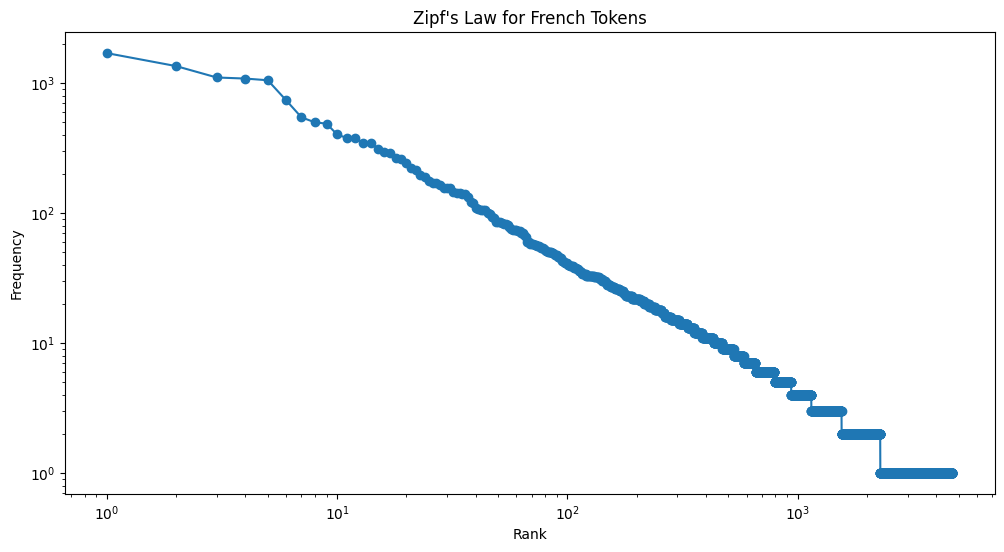

In [20]:

#Zipf
def plot_zipf(tokens, language):
    counter = Counter(tokens)
    most_common = counter.most_common()
    ranks = range(1, len(most_common) + 1)
    frequencies = [freq for _, freq in most_common]

    plt.figure(figsize=(12, 6))
    plt.plot(ranks, frequencies, marker='o')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f'Zipf\'s Law for {language} Tokens')
    plt.show()

plot_zipf(en_tokens, 'English')
plot_zipf(fr_tokens, 'French')


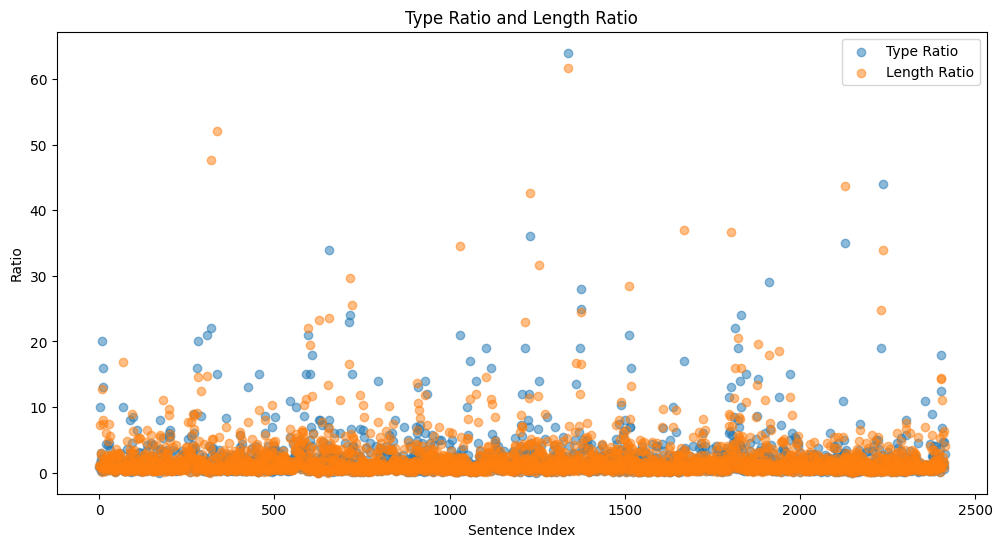

In [21]:

#Les ratios
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['type_ratio'], alpha=0.5, label='Type Ratio')
plt.scatter(df.index, df['length_ratio'], alpha=0.5, label='Length Ratio')
plt.xlabel('Sentence Index')
plt.ylabel('Ratio')
plt.title('Type Ratio and Length Ratio')
plt.legend()
plt.show()